#Proyecto Final Data Science -  Entrega Final

##"Análisis de precios de autos usados"

###Profesor: Gustavo Benítez
###Tutores: Hugo Mon, Ignacio Manuel Fernández
###Alumno: Rodríguez Damián
### Comisión: 61220

#**Abstract**


Este dataset contiene información sobre autos usados, con el objetivo de predecir el precio de los vehículos. La base de datos incluye diversas columnas que describen las características de los autos, como el año de fabricación, el fabricante, el modelo, el estado, el tipo de combustible, el kilometraje (odómetro), y más. Sin embargo, se observa una cantidad significativa de valores faltantes en varias de las columnas. Las columnas más afectadas por datos ausentes son "condition" (condición del auto), "cylinders" (número de cilindros), "manufacturer" (fabricante), "model" (modelo), y "VIN" (número de identificación del vehículo). Además, hay columnas relacionadas con la localización, como la región, el estado y las coordenadas geográficas, algunas de las cuales también presentan valores faltantes. La columna objetivo, "price", no tiene valores ausentes, lo que es fundamental para el objetivo de predicción.

La tarea de predicción se centra en predecir el "price" utilizando las características disponibles, aunque es necesario abordar el tratamiento de datos faltantes y la posible transformación de algunas variables categóricas para mejorar el desempeño de los modelos predictivos. También es importante señalar que algunas de las columnas tienen una alta cantidad de valores nulos, lo que podría requerir una limpieza y transformación detallada antes de proceder con el modelado predictivo.

###Contexto Analítico y Problema Comercial

Desde una perspectiva comercial, este tipo de análisis tiene implicaciones importantes para empresas en el mercado de autos usados, como concesionarios, plataformas de compra-venta de autos, y otros actores en la industria automotriz. Algunas de las preguntas y problemas comerciales que podrían abordarse son:

* Determinación de Precios Óptimos: Para un concesionario o plataforma de venta de autos usados, tener la capacidad de predecir de manera precisa el precio de los vehículos les permitiría establecer precios más competitivos y alineados con las expectativas del mercado. Esto optimiza tanto las ventas como la rentabilidad, al evitar la subvaloración o sobrevaloración de los vehículos.

* Optimización del Inventario: Un análisis del precio en función de las características del auto permitiría a las empresas identificar qué tipos de vehículos tienen una mayor demanda en ciertas regiones o qué características están relacionadas con precios más altos o más bajos. Esto podría ayudar a los concesionarios a tomar decisiones sobre qué autos comprar o mantener en inventario.

* Estimación de Valor de Reventa: Los usuarios o concesionarios que planean vender vehículos usados pueden beneficiarse de estimaciones de precios precisas para obtener una mejor valoración de su vehículo al momento de venderlo. Esto también es relevante para plataformas de reventa que permiten a los usuarios obtener estimaciones rápidas de su vehículo.

* Tendencias del Mercado: La predicción del precio también podría identificar tendencias o patrones emergentes en el mercado, como el impacto de ciertos factores (por ejemplo, el tipo de combustible o el año de fabricación) en la valoración de los vehículos. Esto es valioso para la toma de decisiones estratégicas en las operaciones comerciales.

# **Lectura de datos**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Configurar el entorno de Python en Google Colab
from google.colab import drive
import os

drive.mount("/content/drive")
print(os.getcwd())

os.chdir("/content/drive/My Drive/")
print(os.getcwd())

Mounted at /content/drive
/content
/content/drive/My Drive


##**Dataset de Autos Usados**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science II/vehicles.csv')

In [4]:
df.shape

(426880, 26)

In [5]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## **Descripción de las variables**

id:

* Tipo: int64
* Descripción: Un identificador único para cada entrada en el dataset.

url:

* Tipo: object
* Descripción: URL del anuncio del vehículo en la plataforma donde se publicó.

region:

* Tipo: object
* Descripción: Región geográfica donde el vehículo está listado.

region_url:

* Tipo: object
* Descripción: URL específica de la región o localización del anuncio.

price:

* Tipo: int64
* Descripción: Precio del vehículo en la moneda local.

year:

* Tipo: float64
* Descripción: Año de fabricación del vehículo.

manufacturer:

* Tipo: object
* Descripción: Fabricante o marca del vehículo, como Toyota, Ford, etc.

model:

* Tipo: object
* Descripción: Modelo del vehículo, como Corolla, F-150, etc.

condition:

* Tipo: object
* Descripción: Condición del vehículo (ej. nuevo, usado, como nuevo).

cylinders:

* Tipo: object
* Descripción: Número de cilindros del motor del vehículo (ej. 4, 6, 8).

fuel:
* Tipo: object
* Descripción: Tipo de combustible que utiliza el vehículo (ej. gasolina, diésel, eléctrico).

odometer:
* Tipo: float64
* Descripción: Kilometraje del vehículo (distancia recorrida).

title_status:
* Tipo: object
* Descripción: Estado del título del vehículo (ej. limpio, reconstruido, etc.).

transmission:
* Tipo: object
* Descripción: Tipo de transmisión del vehículo (ej. automática, manual).

VIN:
* Tipo: object
* Descripción: Número de identificación del vehículo (VIN por sus siglas en inglés).

drive:
* Tipo: object
* Descripción: Tipo de tracción del vehículo (ej. tracción delantera, tracción trasera, tracción en las 4 ruedas).

size:
* Tipo: object
* Descripción: Tamaño del vehículo (ej. compacto, mediano, SUV).

type:
* Tipo: object
* Descripción: Tipo de vehículo (ej. sedán, camioneta, SUV).

paint_color:
* Tipo: object
* Descripción: Color de la pintura del vehículo.

image_url:
* Tipo: object
* Descripción: URL de la imagen del vehículo en el anuncio.

description:
* Tipo: object
* Descripción: Descripción textual del vehículo en el anuncio, proporcionada por el vendedor.

county:
* Tipo: float64
* Descripción: Este campo parece no contener datos.

state:
* Tipo: object
* Descripción: Estado en el que se encuentra el vehículo listado (en Estados Unidos, esto podría ser el nombre del estado como California, Texas, etc.).

lat:
* Tipo: float64
* Descripción: Latitud de la ubicación geográfica donde está listado el vehículo.

long:
* Tipo: float64
* Descripción: Longitud de la ubicación geográfica donde está listado el vehículo.

posting_date:
* Tipo: object
* Descripción: Fecha en la que el anuncio del vehículo fue publicado en la plataforma.

# **Data Wrangling - Limpieza y transformación de datos**

In [7]:
# Revisamos si hay datos nulos
print(df.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [8]:
# La variable county no contiene ningún valor asi que la eliminamos
df = df.drop(columns=['county'])

In [9]:
# Completamos algunas variables con la mediana
df['year'].fillna(df['year'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].median(), inplace=True)

<ipython-input-9-146175b78f17>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)
<ipython-input-9-146175b78f17>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [10]:
# Completamos algunas variables con la moda
df['manufacturer'].fillna(df['manufacturer'].mode()[0], inplace=True)
df['model'].fillna(df['model'].mode()[0], inplace=True)
df['condition'].fillna(df['condition'].mode()[0], inplace=True)
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)
df['title_status'].fillna(df['title_status'].mode()[0], inplace=True)
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)

<ipython-input-10-a78ff85d080f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['manufacturer'].fillna(df['manufacturer'].mode()[0], inplace=True)
<ipython-input-10-a78ff85d080f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [11]:
# Completamos algunas variables con valores fijos
df['cylinders'].fillna('4', inplace=True)
df['VIN'].fillna('0', inplace=True)
df['drive'].fillna('4WD', inplace=True)
df['size'].fillna('4', inplace=True)
df['type'].fillna('sedan', inplace=True)
df['paint_color'].fillna('silver', inplace=True)
df['lat'].fillna('0', inplace=True)
df['long'].fillna('0', inplace=True)
df['image_url'].fillna('unknown', inplace=True)
df['description'].fillna('unknown', inplace=True)
df['posting_date'].fillna(method='bfill', inplace=True)

<ipython-input-11-daaaec8ab443>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].fillna('4', inplace=True)
<ipython-input-11-daaaec8ab443>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [12]:
# Convertimos columnas a los tipos de datos correctos
df['year'] = df['year'].astype(int)  # year a entero
df['price'] = df['price'].astype(float)  # precio a float

In [13]:
# Reemplazamos por la media de los precios (excluyendo 0)
mean_price = df.loc[df['price'] > 0, 'price'].mean()
df['price'] = df['price'].replace(0, mean_price)

In [14]:
# Revisar Outliers
# Vamos a utilizar un método simple con IQR para detectar outliers en el precio y el kilometraje
# Calculamos el rango intercuartílico (IQR) para 'price'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

In [15]:
# Filtramos los outliers de price
df = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]

In [16]:
# Realizamos lo mismo para odometer
Q1_odometer = df['odometer'].quantile(0.25)
Q3_odometer = df['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
lower_bound_odometer = Q1_odometer - 1.5 * IQR_odometer
upper_bound_odometer = Q3_odometer + 1.5 * IQR_odometer

# Filtramos los outliers de odometer
df = df[(df['odometer'] >= lower_bound_odometer) & (df['odometer'] <= upper_bound_odometer)]

In [17]:
# Verificamos que no haya valores nulos
print(df.isnull().sum())


id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64


In [18]:
# Mostramos un resumen del dataset limpio
print(df.describe())

                 id          price           year       odometer
count  3.857580e+05  385758.000000  385758.000000  385758.000000
mean   7.311473e+09   18227.299527    2011.075055   91379.304554
std    4.475121e+06   13402.566772       9.449645   60711.765749
min    7.207408e+09       1.000000    1900.000000       0.000000
25%    7.308104e+09    7000.000000    2008.000000   38933.250000
50%    7.312605e+09   14999.000000    2013.000000   86410.000000
75%    7.315246e+09   26995.000000    2017.000000  134000.000000
max    7.317101e+09   66800.000000    2022.000000  280222.000000


# **Análisis Univariado**

In [ ]:
# Estadísticas descriptivas
print(df[['price', 'year', 'odometer']].describe())

               price           year       odometer
count  385758.000000  385758.000000  385758.000000
mean    18227.299527    2011.075055   91379.304554
std     13402.566772       9.449645   60711.765749
min         1.000000    1900.000000       0.000000
25%      7000.000000    2008.000000   38933.250000
50%     14999.000000    2013.000000   86410.000000
75%     26995.000000    2017.000000  134000.000000
max     66800.000000    2022.000000  280222.000000


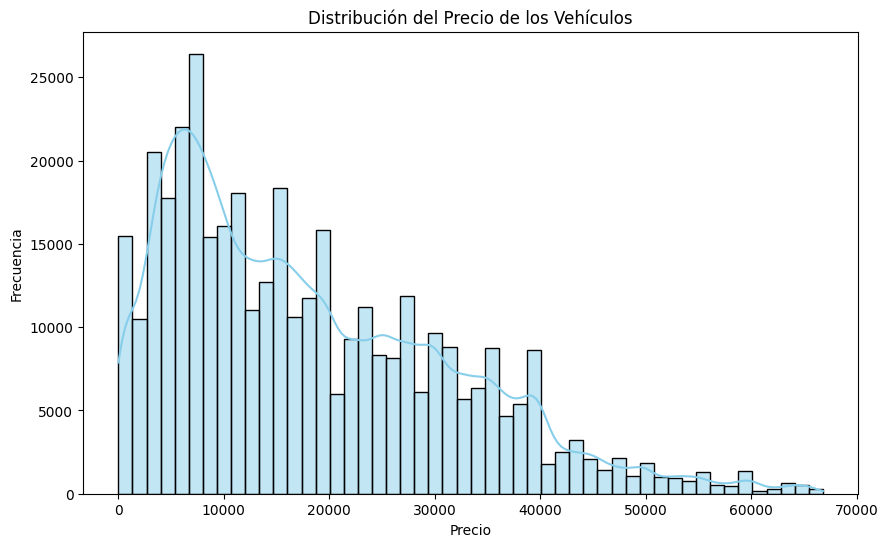

In [ ]:
# Histograma para price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribución del Precio de los Vehículos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

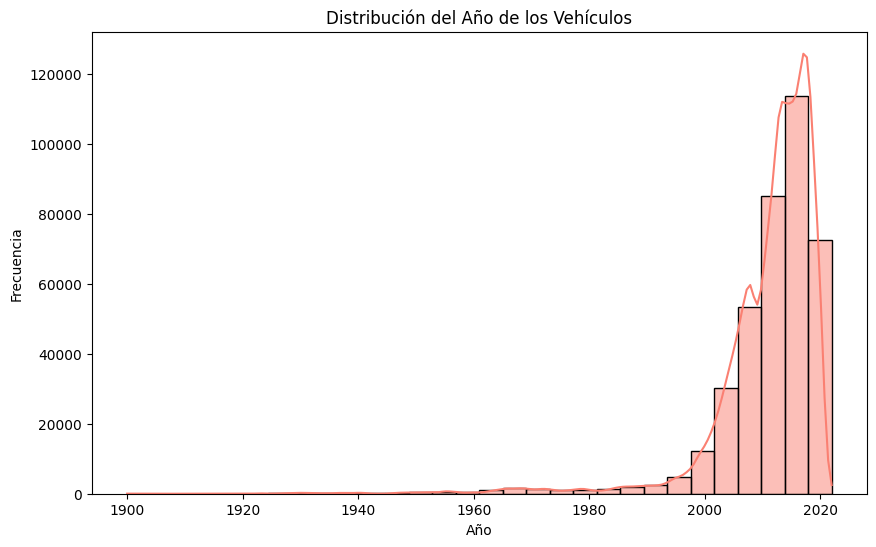

In [ ]:
# Histograma para year
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=30, kde=True, color='salmon')
plt.title('Distribución del Año de los Vehículos')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

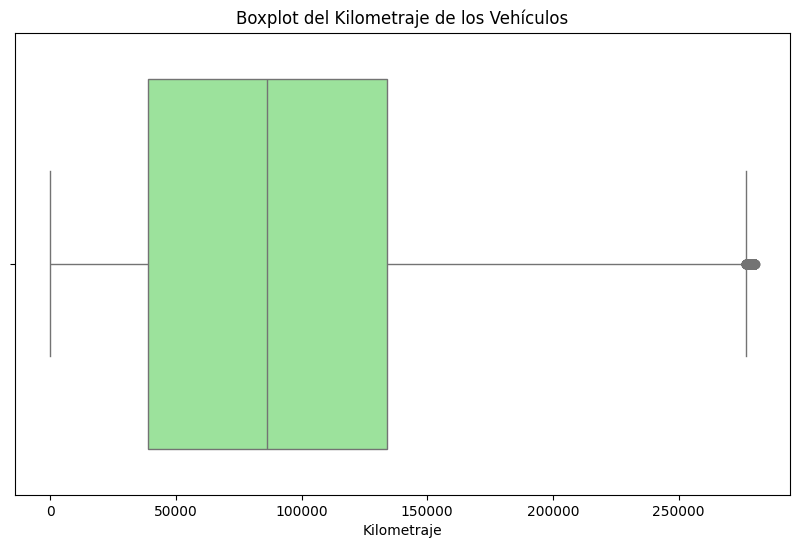

In [ ]:
# Boxplot para odometer
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'], color='lightgreen')
plt.title('Boxplot del Kilometraje de los Vehículos')
plt.xlabel('Kilometraje')
plt.show()

##Análisis de variables categóricas

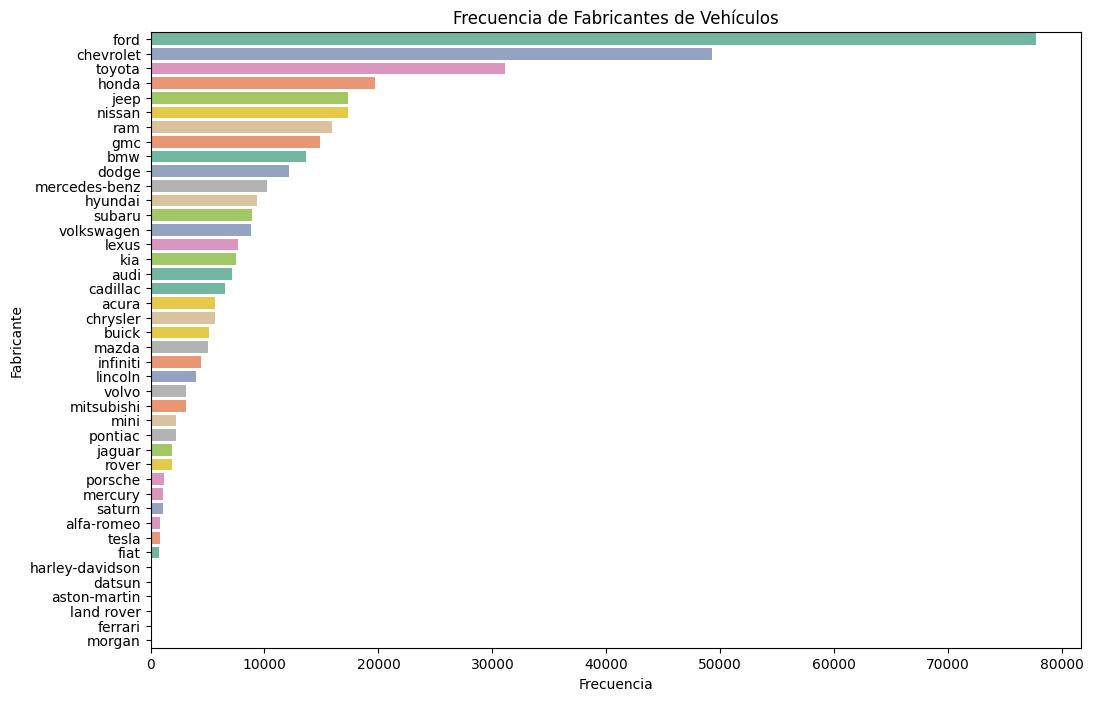

In [ ]:
# Frecuencia de la variable manufacturer
plt.figure(figsize=(12, 8))
sns.countplot(y=df['manufacturer'], order=df['manufacturer'].value_counts().index, hue=df['manufacturer'], palette='Set2', legend=False)
plt.title('Frecuencia de Fabricantes de Vehículos')
plt.xlabel('Frecuencia')
plt.ylabel('Fabricante')
plt.show()

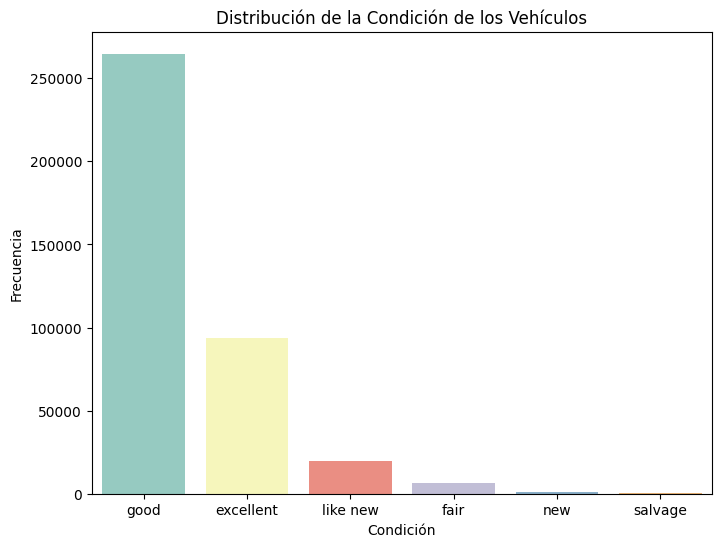

In [ ]:
# Frecuencia de la variable condition
plt.figure(figsize=(8, 6))
sns.countplot(x=df['condition'], order=df['condition'].value_counts().index, hue=df['condition'], palette='Set3', legend=False)
plt.title('Distribución de la Condición de los Vehículos')
plt.xlabel('Condición')
plt.ylabel('Frecuencia')
plt.show()

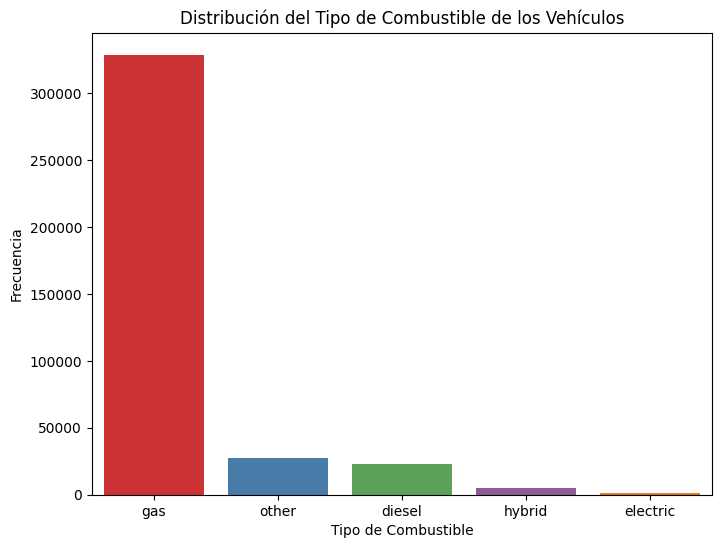

In [ ]:
# Frecuencia de la variable fuel
plt.figure(figsize=(8, 6))
sns.countplot(x=df['fuel'], order=df['fuel'].value_counts().index, hue=df['fuel'], palette='Set1', legend=False)
plt.title('Distribución del Tipo de Combustible de los Vehículos')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Frecuencia')
plt.show()

# **Análisis Bivariado**

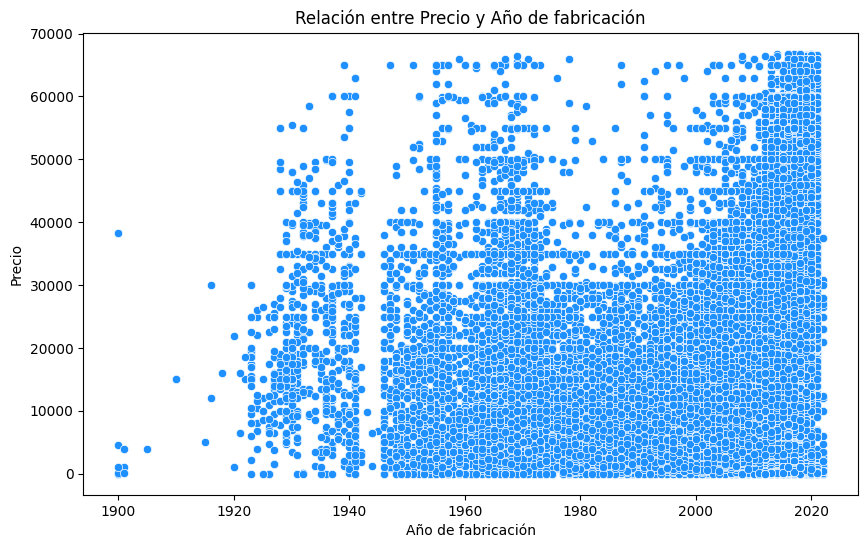

In [ ]:
# Hacemos un diagrama de dispersión para ver cómo varían los precios con el año de fabricación.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['year'], y=df['price'], color='dodgerblue')
plt.title('Relación entre Precio y Año de fabricación')
plt.xlabel('Año de fabricación')
plt.ylabel('Precio')
plt.show()

Este gráfico nos muestra cómo los precios cambian dependiendo del año de fabricación de los vehículos.

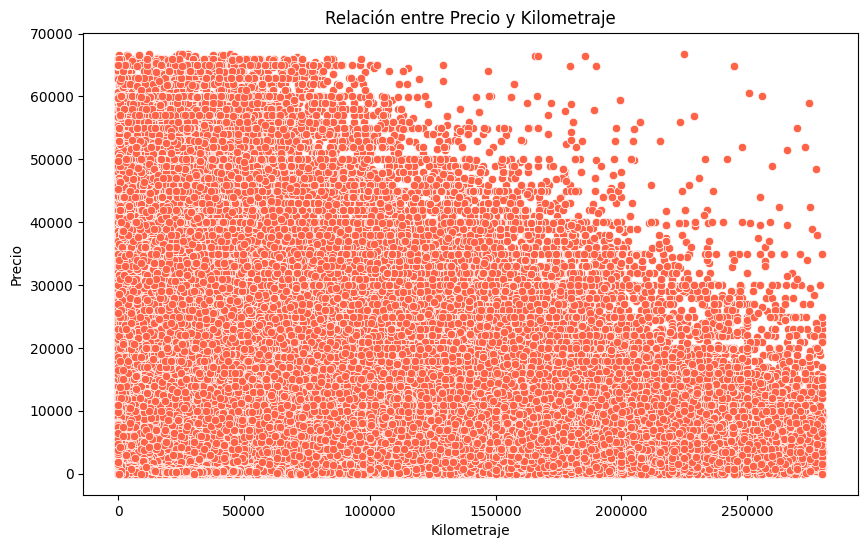

In [ ]:
# Hacemos un diagrama de dispersión también para ver si existe alguna relación entre el kilometraje y su precio.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['odometer'], y=df['price'], color='tomato')
plt.title('Relación entre Precio y Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

Este gráfico nos muestra que los vehículos con más kilometraje tienden a tener precios más bajos.

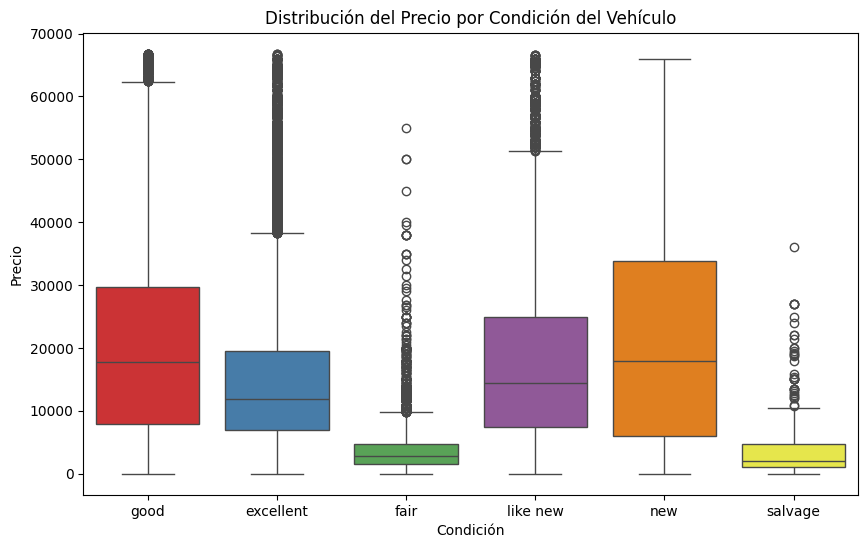

In [ ]:
# Usamos un boxplot para ver cómo varía el precio según la condición del vehículo.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['condition'], y=df['price'], hue=df['condition'], palette='Set1', legend=False)
plt.title('Distribución del Precio por Condición del Vehículo')
plt.xlabel('Condición')
plt.ylabel('Precio')
plt.show()

El boxplot nos muestra la mediana, el rango intercuartílico (IQR) y los valores atípicos del precio para cada categoría de condition.

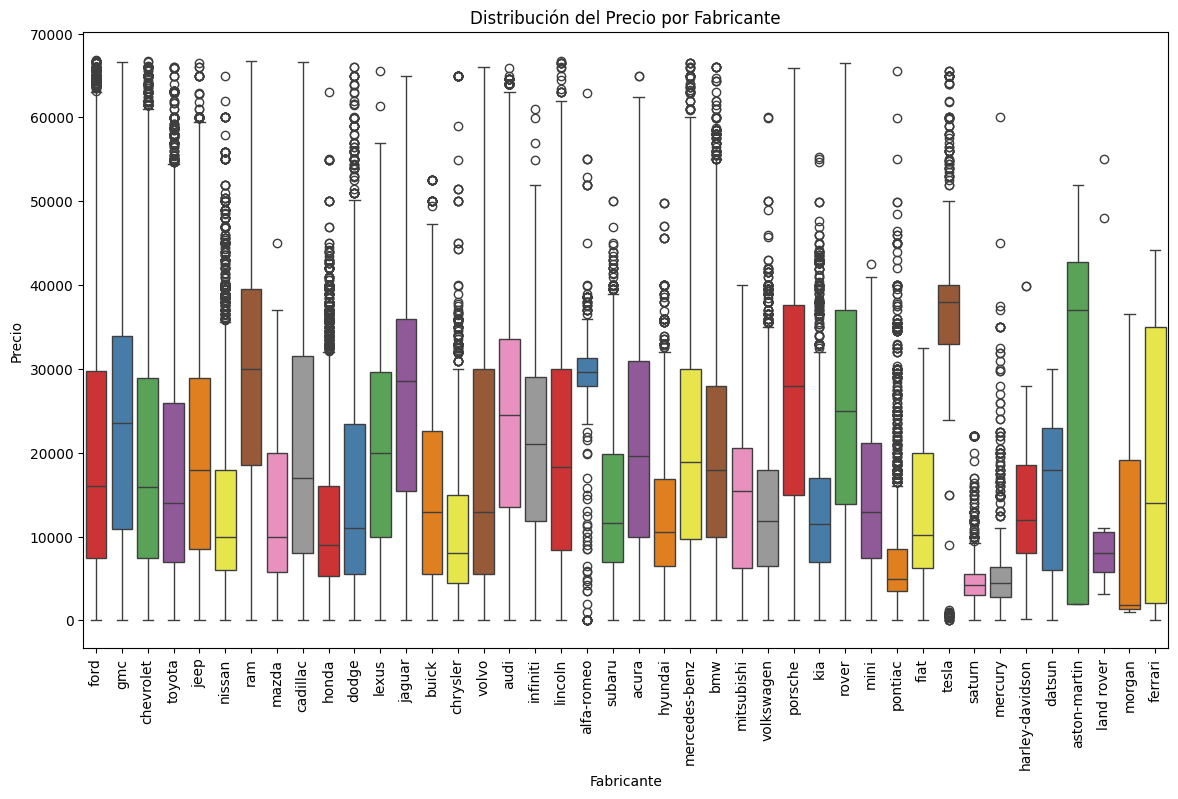

In [ ]:
# Hacemos un boxplot para ver cómo se distribuyen los precios por marca
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['manufacturer'], y=df['price'], hue=df['manufacturer'], palette='Set1', legend=False)
plt.title('Distribución del Precio por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

Este gráfico muestra que algunas marcas tienen precios más altos en promedio que otras.

In [ ]:
# Calcular correlación entre 'price' y 'odometer'
correlation = df[['price', 'odometer']].corr()
print(correlation)

             price  odometer
price     1.000000 -0.513525
odometer -0.513525  1.000000


Este valor indica si hay una relación lineal entre el precio y el kilometraje (un valor cercano a +1 o -1 indica una fuerte correlación, mientras que valores cercanos a 0 indican poca o ninguna correlación).

# **Análisis Multivariado**

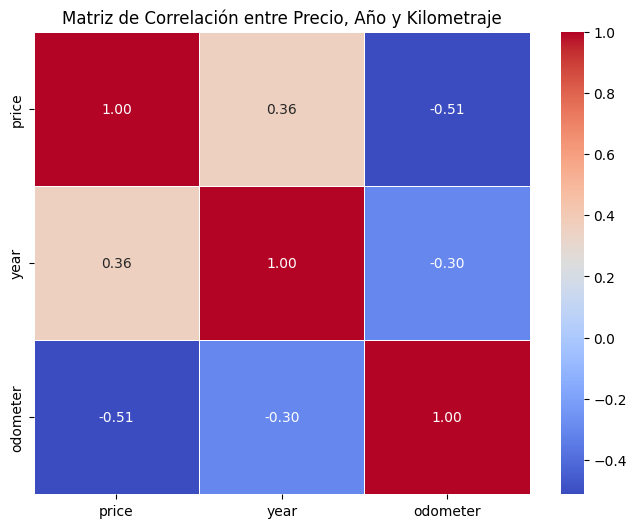

In [ ]:
# Calculamos la matriz de correlación entre variables numéricas
correlation_matrix = df[['price', 'year', 'odometer']].corr()

# Graficamos el heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Precio, Año y Kilometraje')
plt.show()

El heatmap muestra las correlaciones entre las características numéricas.

Hay correlación entre price y year (0.36).

Baja correlación entre price y odometer (-0.51)

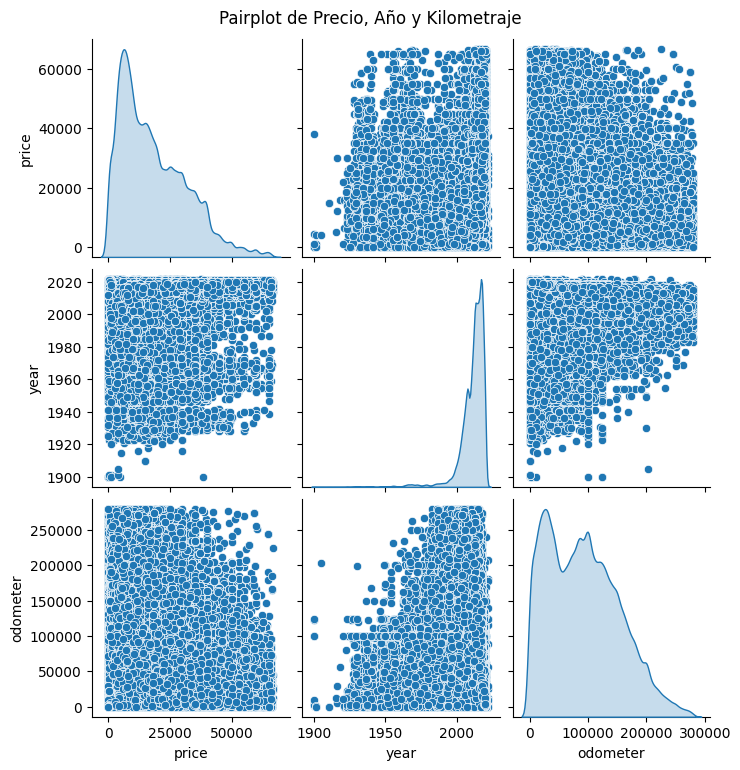

In [ ]:
# Pairplot para visualizar relaciones entre múltiples variables
sns.pairplot(df[['price', 'year', 'odometer']], diag_kind='kde')
plt.suptitle('Pairplot de Precio, Año y Kilometraje', y=1.02)
plt.show()

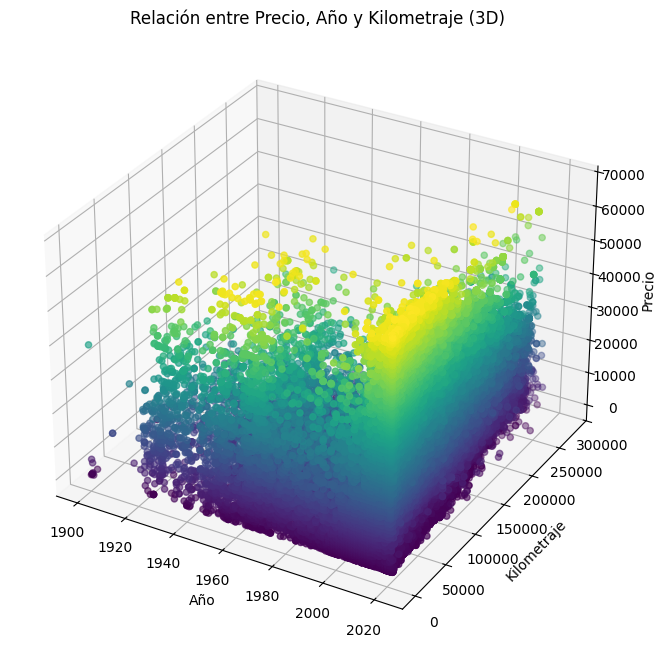

In [ ]:
# Gráfico de dispersión 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['year'], df['odometer'], df['price'], c=df['price'], cmap='viridis')
ax.set_xlabel('Año')
ax.set_ylabel('Kilometraje')
ax.set_zlabel('Precio')
plt.title('Relación entre Precio, Año y Kilometraje (3D)')
plt.show()

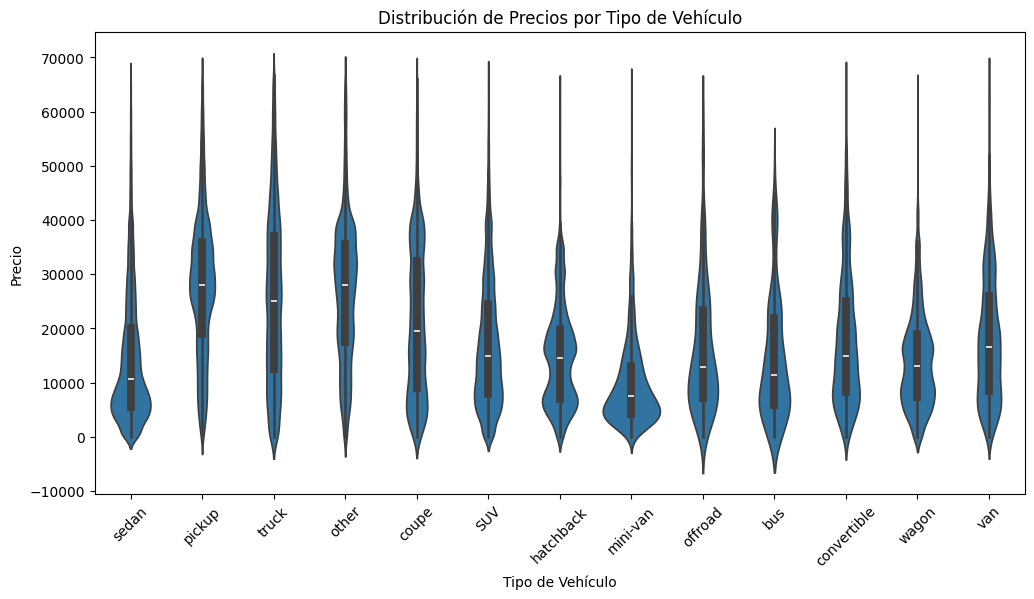

In [ ]:
# Gráfico de violín para la distribución de precios por tipo de vehículo
plt.figure(figsize=(12, 6))
sns.violinplot(x='type', y='price', data=df)
plt.title('Distribución de Precios por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

Muestra la distribución de los precios entre los tipos de vehiculos.

El tipo mini-van tiene el precio más bajo en promedio que los demas tipos.

#**Conclusiones Pre-entrega**

### 1. **Distribución de la variable objetivo (Precio)**

- **Precio de los vehículos**: La variable `price` sigue una distribución sesgada hacia la derecha, con muchos vehículos a precios más bajos y unos pocos a precios altos. Esto es común en mercados de vehículos usados, donde la mayoría de los vehículos son más baratos, pero algunos vehículos de lujo o nuevos pueden tener precios elevados.

### 2. **Valores atípicos (Outliers)**

- **Precios atípicos**: En el caso de que haya vehículos con precios muy bajos o extremadamente altos, estos podrían ser errores en los datos o vehículos excepcionales (por ejemplo, vehículos de lujo o clásicos).

### 3. **Relación entre variables numéricas**

- **Precio vs. Año**: Es probable que veas que los vehículos más nuevos tienden a tener precios más altos, aunque esto no es una regla estricta debido a factores como la marca, el estado y la demanda del modelo.

- **Precio vs. Kilometraje**: Los vehículos con menor kilometraje generalmente tienen precios más altos, lo cual tiene sentido porque los vehículos más nuevos y menos usados suelen ser más caros.

- **Año vs. Kilometraje**: En general, los vehículos más nuevos tienden a tener menos kilometraje, aunque puede haber excepciones (por ejemplo, un vehículo usado mucho en viajes largos).

### 4. **Relación entre variables categóricas y numéricas**

- **Precio vs. Condición del vehículo**: Los vehículos en mejores condiciones suelen tener precios más altos. Si hay categorías como "Excelente", "Bueno", "Regular" o "Para piezas", probablemente verás que los vehículos en la mejor condición tienden a ser más caros.

- **Precio vs. Tipo de combustible**: Dependiendo del tipo de combustible, podrías encontrar que los vehículos eléctricos o híbridos tienen precios más altos que los de gasolina o diésel, lo cual refleja las tendencias de mercado actuales.

- **Precio vs. Fabricante**: Algunas marcas tienen precios más altos en promedio que otras. Por ejemplo, marcas de lujo o premium tienden a tener precios más altos que marcas más asequibles.

### 5. **Datos faltantes**

- **Valores nulos**: Varias columnas como `condition`, `cylinders`, `manufacturer`, `model`, etc., contienen valores nulos. Esto puede ser una señal de que los datos fueron incompletos al momento de ser cargados o recopilados.

- **Columnas sin valores**: La columna `county` no tiene ningún dato, por lo que fue eliminada sin afectar el análisis.

### 6. **Posibles áreas de mejora en la limpieza de datos**

- **Columnas irrelevantes**: Columnas como `url`, `region_url` o `image_url` pueden no ser necesarias para análisis posteriores, ya que no aportan información significativa al modelo predictivo.
  
- **Errores en las variables**: Si se encuentran valores incorrectos o fuera de rango (por ejemplo, un precio de 0 o un kilometraje muy alto), estas filas fueron tratadas.

* **Los precios están fuertemente influenciados por el año de fabricación, el kilometraje y la condición del vehículo.**
* **Los vehículos más nuevos y con menor kilometraje tienen precios más altos.**
* **El tipo de combustible, la marca y la condición del vehículo también son factores importantes que afectan el precio.**
* **Las variables categóricas, como la marca del fabricante o el tipo de combustible, tienen un impacto significativo en el precio.**

El EDA es una etapa crucial para comprender los patrones y relaciones en los datos. Estas conclusiones servirán como base para un modelado predictivo.

# **Preprocesamiento de datos**


###Codificación de variables categóricas

Hacemos una inspección y limpieza de datos:
1. Convertimos la columna posting_date a datetime para facilitar la manipulación
2. Nos fijamos que las columnas sean el dato adecuado para facilitar en análisis
3. Eliminamos valores outliers fuera del rango

In [19]:
#reducimos el dataset a 20.000 filas
df = df.sample(n=1000, random_state=42)

# Eliminamos las columnas no relevantes para el análisis
df.drop(columns=['url', 'image_url', 'description','id', 'posting_date'], inplace=True)

# Conversión de tipos de datos
df['price'] = df['price'].astype(float)
df['year'] = df['year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int, errors='ignore')
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)

# Convertimos columnas categóricas
df['region'] = df['region'].astype('category')
df['manufacturer'] = df['manufacturer'].astype('category')
df['model'] = df['model'].astype('category')

# Eliminamos valores atípicos en 'price' (fuera del rango de 1 a 100,000)
df = df[(df['price'] > 1) & (df['price'] < 100000)]


Codificamos con One-Hot-Enconding las variables categóricas en columnas binarias.

In [20]:
# One-hot encoding para columnas categóricas
#df = pd.get_dummies(df, columns=['region', 'manufacturer', 'model'])
df = pd.get_dummies(df, drop_first=True)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['price', 'lat', 'long']] = scaler.fit_transform(df[['price', 'lat', 'long']])

In [22]:
# Seleccionar solo columnas numéricas
#numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = df.corr()
print(correlation_matrix)

             price      year  odometer       lat      long  region_abilene  \
price     1.000000  0.395072 -0.550063 -0.054720 -0.006764       -0.003124   
year      0.395072  1.000000 -0.327354 -0.039054  0.022485        0.016881   
odometer -0.550063 -0.327354  1.000000  0.024779 -0.009767        0.012665   
lat      -0.054720 -0.039054  0.024779  1.000000 -0.291607       -0.026839   
long     -0.006764  0.022485 -0.009767 -0.291607  1.000000       -0.012651   
...            ...       ...       ...       ...       ...             ...   
state_vt -0.018091  0.014058 -0.000349  0.046375  0.053647       -0.001741   
state_wa -0.005328 -0.070950  0.022285  0.223188 -0.242396       -0.005185   
state_wi -0.025823 -0.013898  0.024318  0.166861  0.034244       -0.006393   
state_wv  0.008223 -0.085499 -0.035882  0.011184  0.030334       -0.001421   
state_wy  0.014395  0.013591  0.019856  0.036011 -0.026666       -0.001004   

          region_akron / canton  region_albany  region_albuquer

#**Feature Selection**

###Selección de variable objetivo y variables independientes

Usamos la técnica de Selección univariante de características con la función SelectKBest de scikit-learn para obtener las características más relevantes

In [23]:
from sklearn.feature_selection import SelectKBest, f_regression

# Selección de las K mejores características según el valor de F (para regresión)
X = df.drop('price', axis=1)  # Variables independientes
y = df['price']  # Variable dependiente

# Seleccionar las 10 mejores características
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Ver las columnas seleccionadas
selected_columns = X.columns[selector.get_support()]
print("Columnas seleccionadas:", selected_columns)

Columnas seleccionadas: Index(['year', 'odometer', 'manufacturer_ram', 'cylinders_4 cylinders',
       'fuel_gas', 'fuel_other', 'transmission_other', 'drive_fwd',
       'type_pickup', 'type_sedan'],
      dtype='object')


Usamos Random Forest, para proporcionar un puntaje de importancia de cada característica.

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de Random Forest
model = RandomForestRegressor()

# Entrenar el modelo
model.fit(X, y)

# Obtener las importancias de las características
importances = model.feature_importances_

# Ordenar las características por su importancia
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Importancia de las características:\n", feature_importance)

# Seleccionar las características más importantes
selected_columns_rf = feature_importance.head(10).index
print("Las 10 características más importantes:", selected_columns_rf)

Importancia de las características:
 year                                            0.407842
odometer                                        0.128730
fuel_gas                                        0.039944
drive_fwd                                       0.033460
long                                            0.032919
                                                  ...   
VIN_WA1LFAFP0CA067521                           0.000000
model_liteace                                   0.000000
region_url_https://statesboro.craigslist.org    0.000000
model_express                                   0.000000
VIN_5FNYF5H90HB025107                           0.000000
Length: 1978, dtype: float64
Las 10 características más importantes: Index(['year', 'odometer', 'fuel_gas', 'drive_fwd', 'long', 'lat',
       'cylinders_8 cylinders', 'cylinders_4 cylinders', 'transmission_other',
       'drive_4wd'],
      dtype='object')


#**Modelado**

###División en entrenamiento y prueba

Dividimos el dataset en dos partes: una para entrenar el modelo y otra para evaluar su rendimiento. Esto nos permite obtener una estimación de la capacidad predictiva del modelo sobre datos no vistos.

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)  # Eliminar la columna de precio
y = df['price']  # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Selección del Modelo

Regresión lineal

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Crear el modelo de regresión lineal
model_lr = LinearRegression()

# Entrenar el modelo
model_lr.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_lr = model_lr.predict(X_test)

# Evaluar el modelo
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Regresión Lineal - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")

Regresión Lineal - MAE: 0.67, MSE: 0.79, R2: 0.21


Gráfico Regresión Lineal

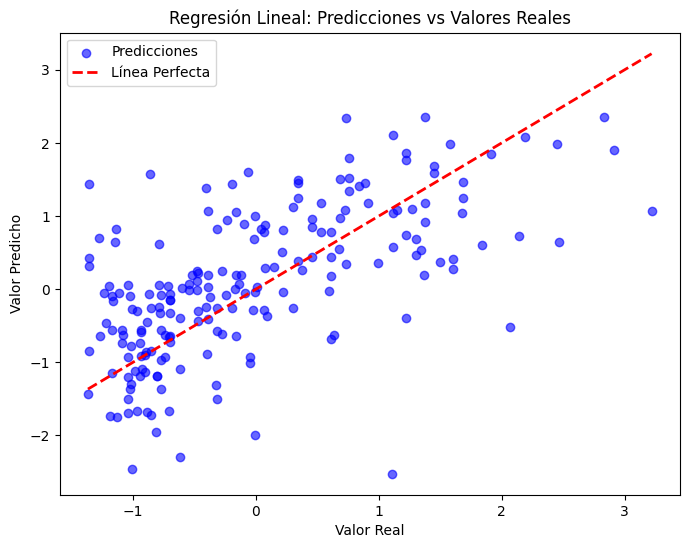

In [27]:
import matplotlib.pyplot as plt

# Graficar Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Línea Perfecta")  # Línea de referencia
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Regresión Lineal: Predicciones vs Valores Reales')
plt.legend()
plt.show()

Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model_rf.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Evaluar el modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")

Random Forest - MAE: 0.45, MSE: 0.41, R2: 0.59


Gráfico Random Forest

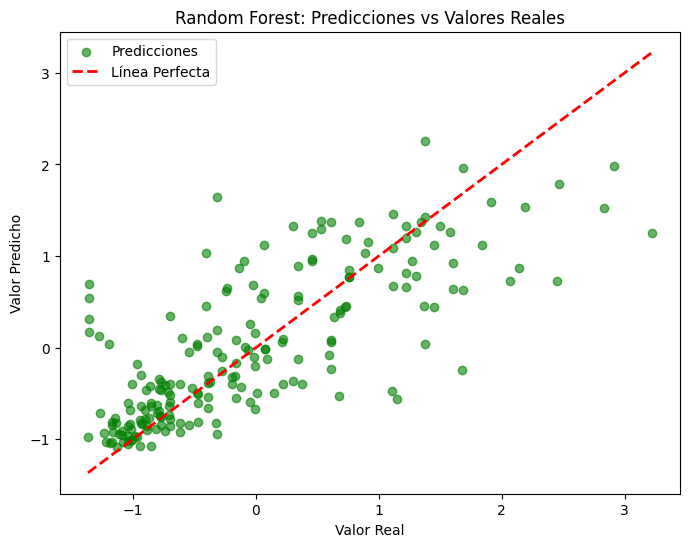

In [29]:
# Graficar Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Línea Perfecta")  # Línea de referencia
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Random Forest: Predicciones vs Valores Reales')
plt.legend()
plt.show()

XGBoost

In [30]:
import xgboost as xgb

# Crear el modelo de XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Entrenar el modelo
model_xgb.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_xgb = model_xgb.predict(X_test)

# Evaluar el modelo
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb:.2f}, MSE: {mse_xgb:.2f}, R2: {r2_xgb:.2f}")

XGBoost - MAE: 0.42, MSE: 0.36, R2: 0.64


Gráfico XGBoost

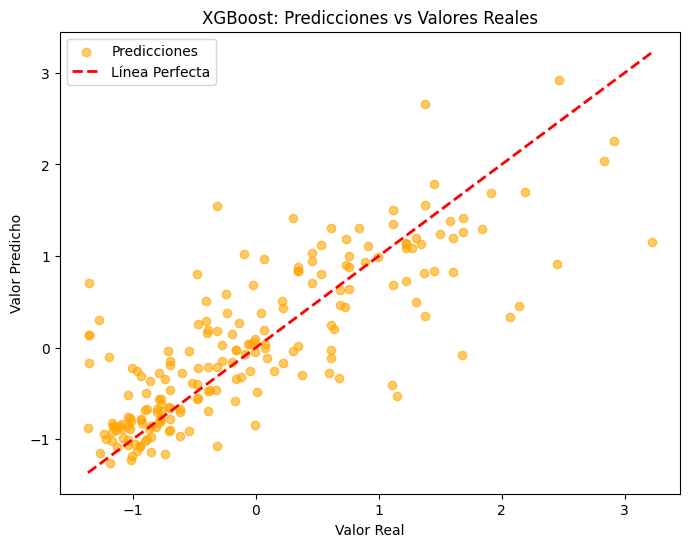

In [31]:
# Graficar Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='orange', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Línea Perfecta")  # Línea de referencia
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('XGBoost: Predicciones vs Valores Reales')
plt.legend()
plt.show()

###Conclusiones
Después de entrenar tres modelos de regresión (Regresión Lineal, Random Forest y XGBoost) para predecir el precio de los vehículos, hemos evaluado su desempeño utilizando tres métricas clave: Error Absoluto Medio (MAE), Error Cuadrático Medio (MSE) y Coeficiente de Determinación (R²).

1. Regresión Lineal
MAE: 0.67
MSE: 0.79
R²: 0.21
La Regresión Lineal presenta un rendimiento relativamente bajo con un R² de 0.21, lo que indica que solo el 21% de la variabilidad en el precio puede ser explicada por las características del modelo. Aunque tiene un error absoluto medio (MAE) de 0.67 y un MSE de 0.79, estos valores sugieren que el modelo no ha capturado bien la relación entre las características del vehículo y su precio.

2. Random Forest
MAE: 0.45
MSE: 0.41
R²: 0.59
El Random Forest ha mostrado un desempeño significativamente mejor que la regresión lineal, con un R² de 0.59. Esto indica que aproximadamente el 59% de la variabilidad en el precio de los vehículos puede ser explicada por las características. Además, el MAE de 0.45 y el MSE de 0.41 son considerablemente más bajos, lo que sugiere que este modelo es más preciso y robusto en comparación con la regresión lineal.

3. XGBoost
MAE: 0.42
MSE: 0.36
R²: 0.64
El modelo XGBoost ha demostrado el mejor rendimiento de todos los modelos evaluados, con el R² más alto (0.64), lo que indica que es capaz de explicar el 64% de la variabilidad en los precios de los vehículos. El MAE de 0.42 y el MSE de 0.36 son los más bajos, lo que sugiere que XGBoost tiene un excelente ajuste para los datos y genera predicciones más precisas.

Comparación de Modelos
Rendimiento:
XGBoost ha sido el modelo más preciso, seguido por Random Forest y luego Regresión Lineal.
XGBoost presenta un R² de 0.64, significativamente más alto que los otros modelos, lo que lo convierte en el más efectivo para este problema de predicción de precios.
Precisión de predicción:
El MAE y el MSE más bajos de XGBoost (0.42 y 0.36, respectivamente) sugieren que este modelo es el que ofrece las predicciones más cercanas a los valores reales.
Flexibilidad:
Random Forest y XGBoost son modelos más complejos y no lineales que la Regresión Lineal, lo que explica su mejor rendimiento. Ambos modelos pueden manejar interacciones no lineales y relaciones complejas entre las variables, lo que los hace más adecuados para este tipo de problemas.
Recomendación
Basado en los resultados, el modelo XGBoost es claramente el mejor para este problema de predicción de precios de vehículos, ya que ofrece el mejor rendimiento en términos de precisión y capacidad explicativa. Random Forest también ofrece buenos resultados y podría ser una opción viable si se busca una alternativa menos compleja. Por otro lado, la Regresión Lineal no es la mejor opción debido a su rendimiento relativamente bajo en este caso.

#**Optimización de Modelo**

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mejores parámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Mejor Random Forest - MAE: 0.45


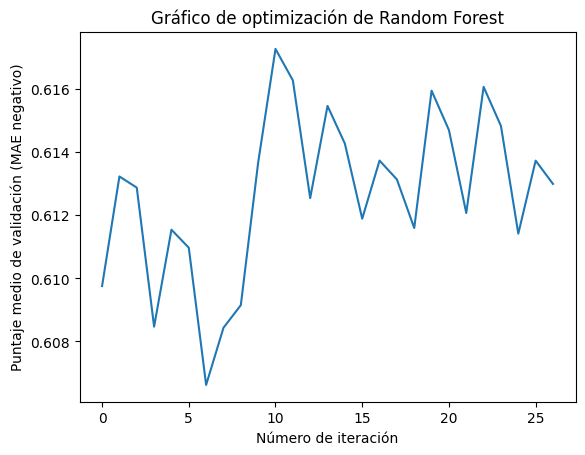

In [40]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Crear el modelo Random Forest
rf = RandomForestRegressor(random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
y_pred_best_rf = best_model.predict(X_test)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
print(f"Mejor Random Forest - MAE: {mae_best_rf:.2f}")

# Gráfico de optimización: mostramos la evolución de la puntuación de validación cruzada
plt.plot(grid_search.cv_results_['mean_test_score'])
plt.xlabel('Número de iteración')
plt.ylabel('Puntaje medio de validación (MAE negativo)')
plt.title('Gráfico de optimización de Random Forest')
plt.show()

###Conclusiones

Eficiencia del modelo Random Forest: Los resultados obtenidos, tanto antes como después de la optimización de hiperparámetros, indican que el modelo Random Forest ya está bastante bien ajustado para el problema, ya que el MAE y el MSE son bastante bajos y el R² es moderado. Un R² de 0.59 significa que aproximadamente el 59% de la variabilidad en el precio de los autos se explica por las variables del modelo.

La optimización de hiperparámetros en el modelo Random Forest ha mostrado que el modelo ya está funcionando bastante bien, pero no ha generado una mejora significativa en las métricas. Esto sugiere que el modelo está cerca de su mejor rendimiento con los parámetros actuales. Para continuar mejorando, su puede probar otras técnicas de ingeniería de características, probar diferentes modelos o revisar la calidad y cantidad de los datos.